# 让 Python 告诉你在哪里“开枪”

In [1]:
import akshare as ak
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

/Users/user/Documents/Fund_Auto_Bot/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [6]:
print('🎯 正在回测并标注买卖点...')
df =ak.fund_open_fund_info_em(symbol='012363',indicator='单位净值走势')
df['date'] = pd.to_datetime(df['净值日期'])
df['price'] = pd.to_numeric(df['单位净值'])
df=df.sort_values('date').set_index('date')
df = df.tail(225)
df['MA5'] = df['price'].rolling(5).mean()
df['MA20'] =df['price'].rolling(20).mean()
df['prev_MA5'] = df['MA5'].shift(1)
df['prev_MA20'] = df['MA20'].shift(1)
buy_single = (df['MA5'] > df['MA20'])&(df['prev_MA5'] < df['prev_MA20'])
sell_single = (df['MA5'] < df['MA20'])&(df['prev_MA5'] > df['prev_MA20'])


🎯 正在回测并标注买卖点...


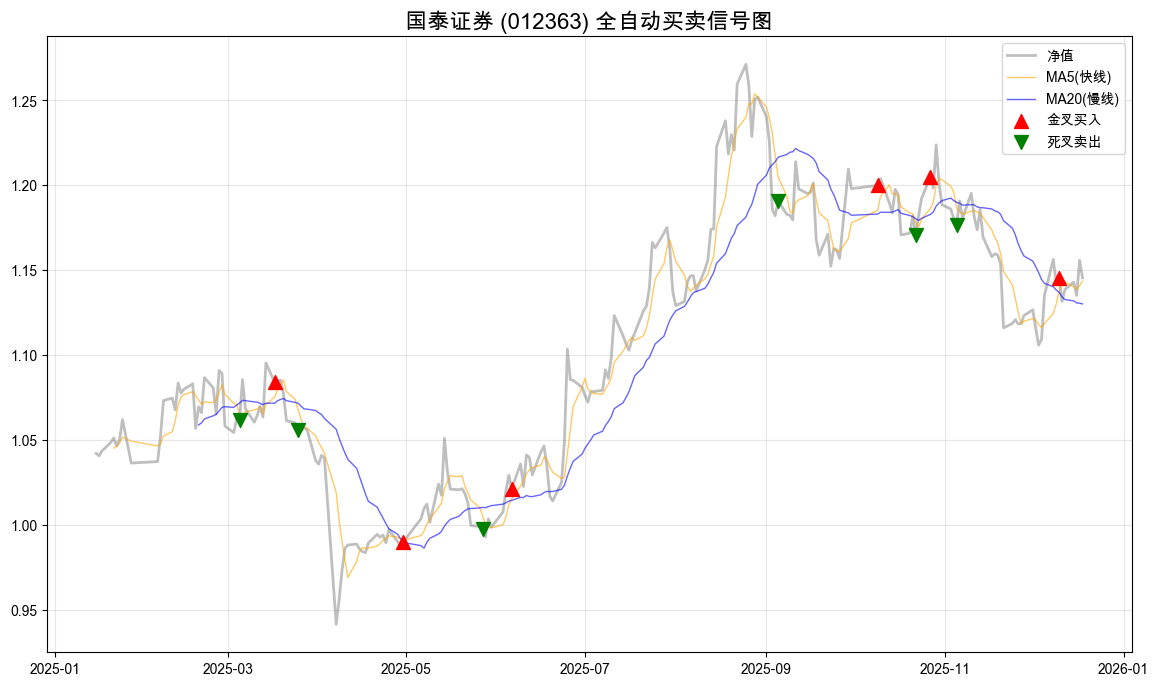

In [7]:
plt.figure(figsize=(14,8))
plt.plot(df.index,df['price'],label = '净值',color ='gray',alpha = 0.5,linewidth=2)
plt.plot(df.index,df['MA5'],label = 'MA5(快线)',color='orange',alpha=0.6,linewidth=1)
plt.plot(df.index,df['MA20'],label = 'MA20(慢线)',color = 'blue',alpha=0.6,linewidth=1)
plt.scatter(df.loc[buy_single].index,df.loc[buy_single]['price'],marker='^',color= 'red',s=100,label = '金叉买入',zorder=5)
plt.scatter(df.loc[sell_single].index,df.loc[sell_single]['price'],marker='v',color='green',s=100,label='死叉卖出',zorder=5)
plt.title('国泰证券 (012363) 全自动买卖信号图',fontsize=16)
plt.grid(True,alpha=0.3)
plt.legend()
plt.show()


In [8]:
last_buy = df[buy_single].index[-1]
last_sell = df[sell_single].index[-1]
print('-'*30)
print(f'🕵️‍♂️ 信号侦察报告：')
print(f"最近一次买点 (金叉): {last_buy.date()}")
print(f"最近一次卖点 (死叉): {last_sell.date()}")
if last_buy >last_sell:
    print('💡 当前状态：【持仓中】(最后一次信号是买入)')
else:
    print('💡 当前状态：【空仓中】(最后一次信号是卖出)')
print('-'*30)

------------------------------
🕵️‍♂️ 信号侦察报告：
最近一次买点 (金叉): 2025-12-10
最近一次卖点 (死叉): 2025-11-05
💡 当前状态：【持仓中】(最后一次信号是买入)
------------------------------
